In [2]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
import nltk
import re
import string
import numpy as np
import spacy
import pandas as pd
from fuzzywuzzy import fuzz
from nltk.corpus import stopwords
import heapq
import yaml
from nltk.stem import WordNetLemmatizer, PorterStemmer

from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig
from scipy.special import softmax
import numpy as np
from array import array
import copy

nlp = spacy.load('en_core_web_lg')

df = pd.read_csv('./scraper/archive/react-useeffect.csv', names=["POSTID", "POSTLINK", "POSTTITLE", "POSTBODY", "POSTDATE", "POSTVOTECOUNTS", "COMMENTID", "COMMENTSCORE", "COMMENTUSERNAME", "COMMENTTEXT", "COMMENTDATETIME", "ANSWERID", "ANSWERTEXT", "ANSWERBODY", "ANSWERDATETIME", "ANSWERVOTECOUNTS", "ANSWERCMTID", "ANSWERCMTTEXT", "ANSWERCMTBODY", "ANSWERCMTDATETIME", "ANSWERCMTVOTECOUNTS" , "TYPE"])
query = 'Useeffect hook rerenders infinitely'

print(df.shape)
display(df.head())

df = pd.read_csv('./scraper/archive/react-useeffect-final.csv', names=["POSTID", "POSTLINK", "POSTTITLE", "POSTBODY", "POSTDATE", "POSTVOTECOUNTS", "COMMENTID", "COMMENTSCORE", "COMMENTUSERNAME", "COMMENTTEXT", "COMMENTDATETIME", "ANSWERID", "ANSWERTEXT", "ANSWERBODY", "ANSWERDATETIME", "ANSWERVOTECOUNTS", "ANSWERCMTID", "ANSWERCMTTEXT", "ANSWERCMTBODY", "ANSWERCMTDATETIME", "ANSWERCMTVOTECOUNTS" , "TYPE"])
query = 'Useeffect hook rerenders infinitely'

print(df.shape)
display(df.head())

(3328, 22)


,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,...,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
0,75130904,https://stackoverflow.com/questions/75130904/h...,How to avoid a small delay in scrolling on rea...,\n \n<p>I have a component that...,"('2023-01-16 06:36:31Z',)","('2',)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post
1,75130904,https://stackoverflow.com/questions/75130904/h...,How to avoid a small delay in scrolling on rea...,\n \n<p>I have a component that...,"('2023-01-16 06:36:31Z',)","('2',)",NaN,NaN,NaN,NaN,...,"It sounds like you may need: useLayoutEffect, ...","('\n<p>It sounds like you may need: <a href=""...","2023-01-16 07:38:44Z, License: CC BY-SA 4.0","('2',)",NaN,NaN,NaN,NaN,NaN,answer
2,75130904,https://stackoverflow.com/questions/75130904/h...,How to avoid a small delay in scrolling on rea...,\n \n<p>I have a component that...,"('2023-01-16 06:36:31Z',)","('2',)",NaN,NaN,NaN,NaN,...,"It sounds like you may need: useLayoutEffect, ...","('\n<p>It sounds like you may need: <a href=""...","2023-01-16 07:38:44Z, License: CC BY-SA 4.0","('2',)","('132582008',)",it works! thank you! never used useLayoutEffec...,('\n \n <span cl...,14 hours ago,"('',)",answer_comment
3,75122338,https://stackoverflow.com/questions/75122338/r...,React useEffect called twice even with strict ...,\n \n<p>I'm new to React and am...,"('2023-01-15 01:01:27Z',)","('1',)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post
4,75122338,https://stackoverflow.com/questions/75122338/r...,React useEffect called twice even with strict ...,\n \n<p>I'm new to React and am...,"('2023-01-15 01:01:27Z',)","('1',)",comment-132566773,NaN,segFault,"You might just be missing a dependency array, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post_comment


(3336, 22)


,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,...,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
0,75158231,https://stackoverflow.com/questions/75158231/r...,React useEffect OnSubmit Rendering Post api mu...,"\n \n<pre class=""lang-js s-code...","('2023-01-18 11:02:43Z',)","('0',)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post
1,75140656,https://stackoverflow.com/questions/75140656/h...,How do I set a timer on React/UseEffect hook a...,\n \n<p>I'm trying to set a tim...,"('2023-01-16 23:25:33Z',)","('1',)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post
2,75140656,https://stackoverflow.com/questions/75140656/h...,How do I set a timer on React/UseEffect hook a...,\n \n<p>I'm trying to set a tim...,"('2023-01-16 23:25:33Z',)","('1',)",comment-132598809,1.0,jsejcksn,"Rather than <a href=""https://en.wikipedia.org/...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post_comment
3,75140656,https://stackoverflow.com/questions/75140656/h...,How do I set a timer on React/UseEffect hook a...,\n \n<p>I'm trying to set a tim...,"('2023-01-16 23:25:33Z',)","('1',)",comment-132598829,NaN,Gary,"Yes, good suggestion. This was just a test to ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post_comment
4,75140656,https://stackoverflow.com/questions/75140656/h...,How do I set a timer on React/UseEffect hook a...,\n \n<p>I'm trying to set a tim...,"('2023-01-16 23:25:33Z',)","('1',)",comment-132598848,NaN,Chris,I would have done more or less what you have d...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post_comment


In [25]:
ALL_COLS = ["POSTID", "POSTLINK", "POSTTITLE", "POSTBODY", "POSTDATE", "POSTVOTECOUNTS", "COMMENTID", "COMMENTSCORE", "COMMENTUSERNAME", "COMMENTTEXT", "COMMENTDATETIME", "ANSWERID", "ANSWERTEXT", "ANSWERBODY", "ANSWERDATETIME", "ANSWERVOTECOUNTS", "ANSWERCMTID", "ANSWERCMTTEXT", "ANSWERCMTBODY", "ANSWERCMTDATETIME", "ANSWERCMTVOTECOUNTS" , "TYPE"]

dPOST  = pd.DataFrame(columns=ALL_COLS)
dPOST = df.copy();
dPOST = dPOST.drop(columns=['COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERID', 'ANSWERTEXT', 'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS', 'ANSWERCMTID', 'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS'])
# drop if type is not post
dPOST = dPOST[dPOST['TYPE'] == 'post']
display(dPOST.head(3))

dfPC = pd.DataFrame(columns=ALL_COLS)
dfPC = df.copy();
dfPC = dfPC.drop(columns=['ANSWERID', 'ANSWERTEXT', 'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS', 'ANSWERCMTID', 'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS'])
# drop if type is not post
dfPC = dfPC[dfPC['TYPE'] == 'post_comment']
display(dfPC.head(3))

dfA = pd.DataFrame(columns=ALL_COLS)
dfA = df.copy();
dfA = dfA.drop(columns=['POSTLINK', 'POSTBODY', 'POSTDATE', 'POSTVOTECOUNTS', 'COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERCMTID', 'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS'])

dfAAC = dfA[dfA['TYPE'] == 'answer']
display(dfAAC.head(3))

dFAC = pd.DataFrame(columns=ALL_COLS)
dFAC = df.copy();
dFAC = dFAC.drop(columns=['POSTLINK', 'POSTBODY', 'POSTDATE', 'POSTVOTECOUNTS', 'COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERTEXT', 'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS'])
dFACT = dFAC[dFAC['TYPE'] == 'answer_comment']
display(dFACT.head(3))

,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,TYPE
0,75130904,https://stackoverflow.com/questions/75130904/h...,How to avoid a small delay in scrolling on rea...,\n \n<p>I have a component that...,"('2023-01-16 06:36:31Z',)","('2',)",post
3,75122338,https://stackoverflow.com/questions/75122338/r...,React useEffect called twice even with strict ...,\n \n<p>I'm new to React and am...,"('2023-01-15 01:01:27Z',)","('1',)",post
11,75118187,https://stackoverflow.com/questions/75118187/r...,React useEffect not triggered on element clien...,\n \n<p>I have a component with...,"('2023-01-14 13:12:48Z',)","('1',)",post


,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,COMMENTDATETIME,TYPE
4,75122338,https://stackoverflow.com/questions/75122338/r...,React useEffect called twice even with strict ...,\n \n<p>I'm new to React and am...,"('2023-01-15 01:01:27Z',)","('1',)",comment-132566773,NaN,segFault,"You might just be missing a dependency array, ...","2023-01-15 01:10:53Z, License: CC BY-SA 4.0",post_comment
12,75118187,https://stackoverflow.com/questions/75118187/r...,React useEffect not triggered on element clien...,\n \n<p>I have a component with...,"('2023-01-14 13:12:48Z',)","('1',)",comment-132559365,NaN,Sergey Sosunov,Does this answer your question? Detect element...,"2023-01-14 13:19:20Z, License: CC BY-SA 4.0",post_comment
13,75118187,https://stackoverflow.com/questions/75118187/r...,React useEffect not triggered on element clien...,\n \n<p>I have a component with...,"('2023-01-14 13:12:48Z',)","('1',)",comment-132559388,NaN,Sergey Sosunov,Or this one useEffect without deps array. You ...,"2023-01-14 13:22:20Z, License: CC BY-SA 4.0",post_comment


,POSTID,POSTTITLE,ANSWERID,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,TYPE
1,75130904,How to avoid a small delay in scrolling on rea...,75131129.0,"It sounds like you may need: useLayoutEffect, ...","('\n<p>It sounds like you may need: <a href=""...","2023-01-16 07:38:44Z, License: CC BY-SA 4.0","('2',)",answer
5,75122338,React useEffect called twice even with strict ...,75122385.0,The issue here is that the useEffect hook is m...,('\n<p>The issue here is that the <code>useEff...,"2023-01-15 02:00:46Z, License: CC BY-SA 4.0","('4',)",answer
19,75114654,socket.io fires event twice in react useEffect...,75114744.0,"""the only way this useEffect hook render once ...","('\n<p>""the only way this useEffect hook rende...","2023-01-14 06:16:44Z, License: CC BY-SA 4.0","('1',)",answer


,POSTID,POSTTITLE,ANSWERID,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
2,75130904,How to avoid a small delay in scrolling on rea...,75131129.0,"('132582008',)",it works! thank you! never used useLayoutEffec...,('\n \n <span cl...,14 hours ago,"('',)",answer_comment
6,75122338,React useEffect called twice even with strict ...,75122385.0,"('132567007',)","updating the dependency may resolve the issue,...",('\n \n <span cl...,yesterday,"('',)",answer_comment
7,75122338,React useEffect called twice even with strict ...,75122385.0,"('132567065',)",@Shah fetchWeekly is an async function and it'...,('\n \n <span cl...,yesterday,"('1',)",answer_comment


# Explanatory Analysis

#### Clean out noisy values

In [26]:
import warnings
warnings.filterwarnings('ignore')

dPOST['POSTVOTECOUNTS'] = dPOST['POSTVOTECOUNTS'].str.replace(r"(", '')
dPOST['POSTVOTECOUNTS'] = dPOST['POSTVOTECOUNTS'].str.replace(r")", '')
dPOST['POSTVOTECOUNTS'] = dPOST['POSTVOTECOUNTS'].str.replace(r"'", '')
dPOST['POSTVOTECOUNTS'] = dPOST['POSTVOTECOUNTS'].str.replace(r",", '')

dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(r"(", '')
dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(r")", '')
dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(r"'", '')
dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(r",", '')
display(dPOST.head(1))

dfPC['POSTVOTECOUNTS'] = dfPC['POSTVOTECOUNTS'].str.replace(r"(", '')
dfPC['POSTVOTECOUNTS'] = dfPC['POSTVOTECOUNTS'].str.replace(r")", '')
dfPC['POSTVOTECOUNTS'] = dfPC['POSTVOTECOUNTS'].str.replace(r"'", '')
dfPC['POSTVOTECOUNTS'] = dfPC['POSTVOTECOUNTS'].str.replace(r",", '')

dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r"(", '')
dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r")", '')
dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r"'", '')
dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r",", '')
dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r",", '')
dfPC['COMMENTDATETIME'] = dfPC['COMMENTDATETIME'].str.replace(r", License: CC BY-SA 4.0", '')
dfPC['COMMENTUSERNAME'] = dfPC['COMMENTUSERNAME'].str.replace(r"segFault", " ")
display(dfPC.head(1))

dfAAC['ANSWERVOTECOUNTS'] = dfAAC['ANSWERVOTECOUNTS'].str.replace(r"(", '')
dfAAC['ANSWERVOTECOUNTS'] = dfAAC['ANSWERVOTECOUNTS'].str.replace(r")", '')
dfAAC['ANSWERVOTECOUNTS'] = dfAAC['ANSWERVOTECOUNTS'].str.replace(r"'", '')
dfAAC['ANSWERVOTECOUNTS'] = dfAAC['ANSWERVOTECOUNTS'].str.replace(r",", '')

dfAAC['ANSWERDATETIME'] = dfAAC['ANSWERDATETIME'].str.replace(r", License: CC BY-SA 4.0", '')
display(dfAAC.head(1))

dFACT['ANSWERCMTVOTECOUNTS'] = dFACT['ANSWERCMTVOTECOUNTS'].str.replace(r"(", '')
dFACT['ANSWERCMTVOTECOUNTS'] = dFACT['ANSWERCMTVOTECOUNTS'].str.replace(r")", '')
dFACT['ANSWERCMTVOTECOUNTS'] = dFACT['ANSWERCMTVOTECOUNTS'].str.replace(r"'", '')
dFACT['ANSWERCMTVOTECOUNTS'] = dFACT['ANSWERCMTVOTECOUNTS'].str.replace(r",", '')

dFACT['ANSWERCMTID'] = dFACT['ANSWERCMTID'].str.replace(r"(", '')
dFACT['ANSWERCMTID'] = dFACT['ANSWERCMTID'].str.replace(r")", '')
dFACT['ANSWERCMTID'] = dFACT['ANSWERCMTID'].str.replace(r"'", '')
dFACT['ANSWERCMTID'] = dFACT['ANSWERCMTID'].str.replace(r",", '')
display(dFACT.head(1))

,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,TYPE
0,75130904,https://stackoverflow.com/questions/75130904/h...,How to avoid a small delay in scrolling on rea...,\n \n<p>I have a component that...,2023-01-16 06:36:31Z,2,post


,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,COMMENTDATETIME,TYPE
4,75122338,https://stackoverflow.com/questions/75122338/r...,React useEffect called twice even with strict ...,\n \n<p>I'm new to React and am...,2023-01-15 01:01:27Z,1,comment-132566773,NaN,,"You might just be missing a dependency array, ...",2023-01-15 01:10:53Z,post_comment


,POSTID,POSTTITLE,ANSWERID,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,TYPE
1,75130904,How to avoid a small delay in scrolling on rea...,75131129.0,"It sounds like you may need: useLayoutEffect, ...","('\n<p>It sounds like you may need: <a href=""...",2023-01-16 07:38:44Z,2,answer


,POSTID,POSTTITLE,ANSWERID,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
2,75130904,How to avoid a small delay in scrolling on rea...,75131129.0,132582008,it works! thank you! never used useLayoutEffec...,('\n \n <span cl...,14 hours ago,,answer_comment


#### Handle Missing Values

In [27]:
# transform empty values to NaN
dPOST = dPOST.replace(r'^\s*$', np.nan, regex=True)
dfPC = dfPC.replace(r'^\s*$', np.nan, regex=True)
dfAAC = dfAAC.replace(r'^\s*$', np.nan, regex=True)
dFACT = dFACT.replace(r'^\s*$', np.nan, regex=True)

display(dPOST.head(1))
display(dfPC.head(1))
display(dfAAC.head(1))
display(dFACT.head(1))

,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,TYPE
0,75130904,https://stackoverflow.com/questions/75130904/h...,How to avoid a small delay in scrolling on rea...,\n \n<p>I have a component that...,2023-01-16 06:36:31Z,2,post


,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,COMMENTDATETIME,TYPE
4,75122338,https://stackoverflow.com/questions/75122338/r...,React useEffect called twice even with strict ...,\n \n<p>I'm new to React and am...,2023-01-15 01:01:27Z,1,comment-132566773,NaN,NaN,"You might just be missing a dependency array, ...",2023-01-15 01:10:53Z,post_comment


,POSTID,POSTTITLE,ANSWERID,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,TYPE
1,75130904,How to avoid a small delay in scrolling on rea...,75131129.0,"It sounds like you may need: useLayoutEffect, ...","('\n<p>It sounds like you may need: <a href=""...",2023-01-16 07:38:44Z,2,answer


,POSTID,POSTTITLE,ANSWERID,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
2,75130904,How to avoid a small delay in scrolling on rea...,75131129.0,132582008,it works! thank you! never used useLayoutEffec...,('\n \n <span cl...,14 hours ago,NaN,answer_comment


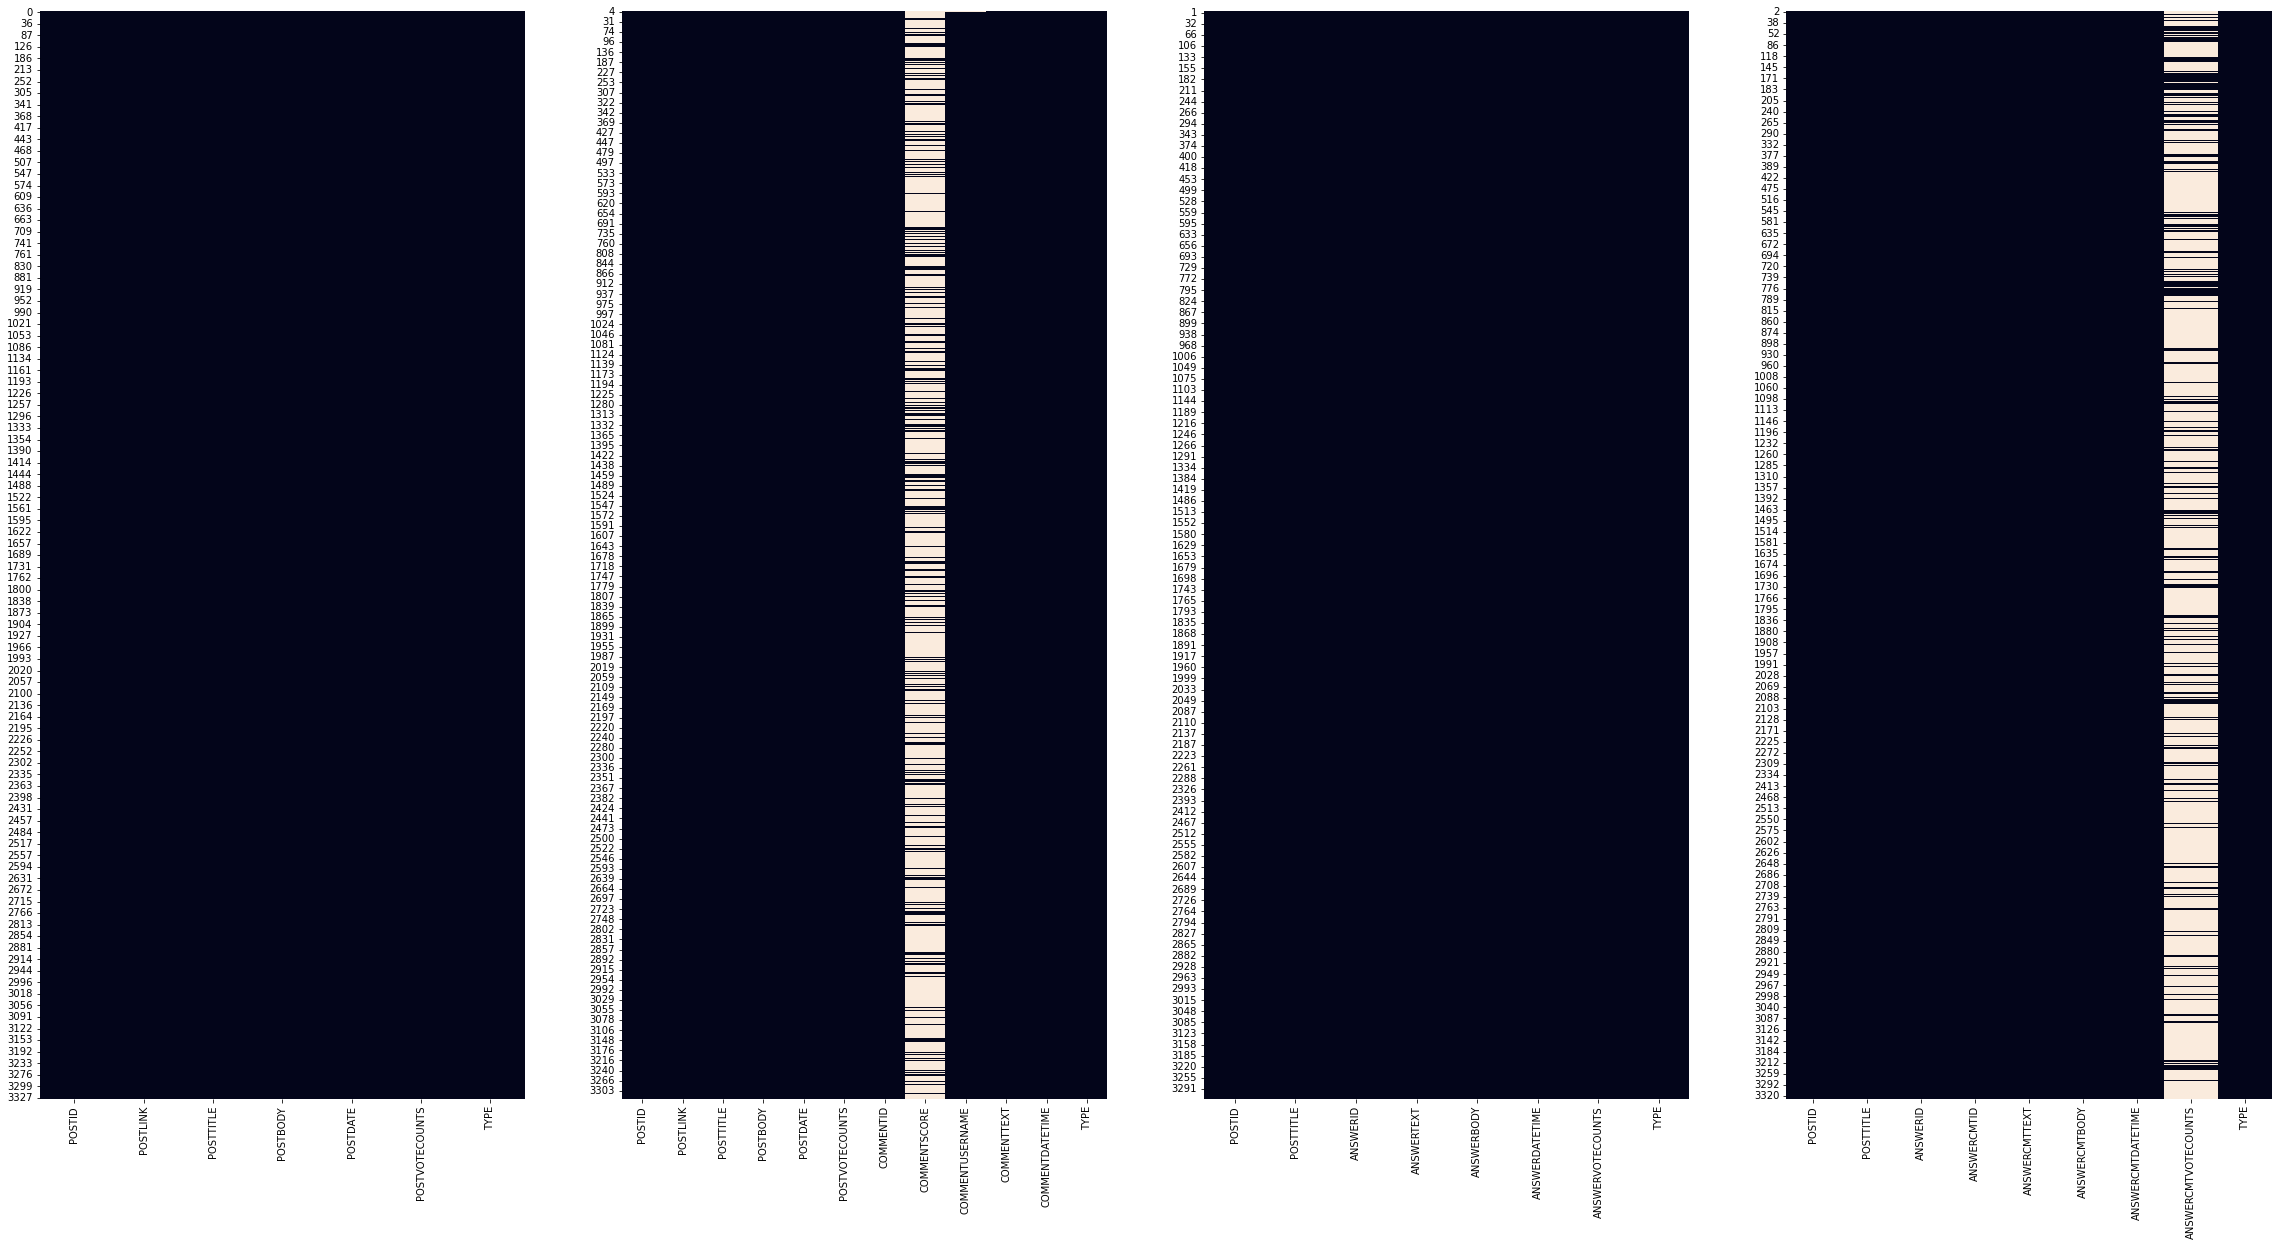

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1, 4, figsize=(40, 20))
sns.heatmap(dPOST.isnull(), cbar=False, ax=axs[0])
sns.heatmap(dfPC.isnull(), cbar=False, ax=axs[1])
sns.heatmap(dfAAC.isnull(), cbar=False, ax=axs[2])
sns.heatmap(dFACT.isnull(), cbar=False, ax=axs[3])
plt.show()

In [29]:
# replace nan values to 0 
dfPC = dfPC.fillna(0)
dFACT = dFACT.fillna(0)

display(dPOST.head(1))
display(dfPC.head(1))
display(dfAAC.head(1))
display(dFACT.head(1))

,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,TYPE
0,75130904,https://stackoverflow.com/questions/75130904/h...,How to avoid a small delay in scrolling on rea...,\n \n<p>I have a component that...,2023-01-16 06:36:31Z,2,post


,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,COMMENTDATETIME,TYPE
4,75122338,https://stackoverflow.com/questions/75122338/r...,React useEffect called twice even with strict ...,\n \n<p>I'm new to React and am...,2023-01-15 01:01:27Z,1,comment-132566773,0.0,0,"You might just be missing a dependency array, ...",2023-01-15 01:10:53Z,post_comment


,POSTID,POSTTITLE,ANSWERID,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,TYPE
1,75130904,How to avoid a small delay in scrolling on rea...,75131129.0,"It sounds like you may need: useLayoutEffect, ...","('\n<p>It sounds like you may need: <a href=""...",2023-01-16 07:38:44Z,2,answer


,POSTID,POSTTITLE,ANSWERID,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
2,75130904,How to avoid a small delay in scrolling on rea...,75131129.0,132582008,it works! thank you! never used useLayoutEffec...,('\n \n <span cl...,14 hours ago,0,answer_comment


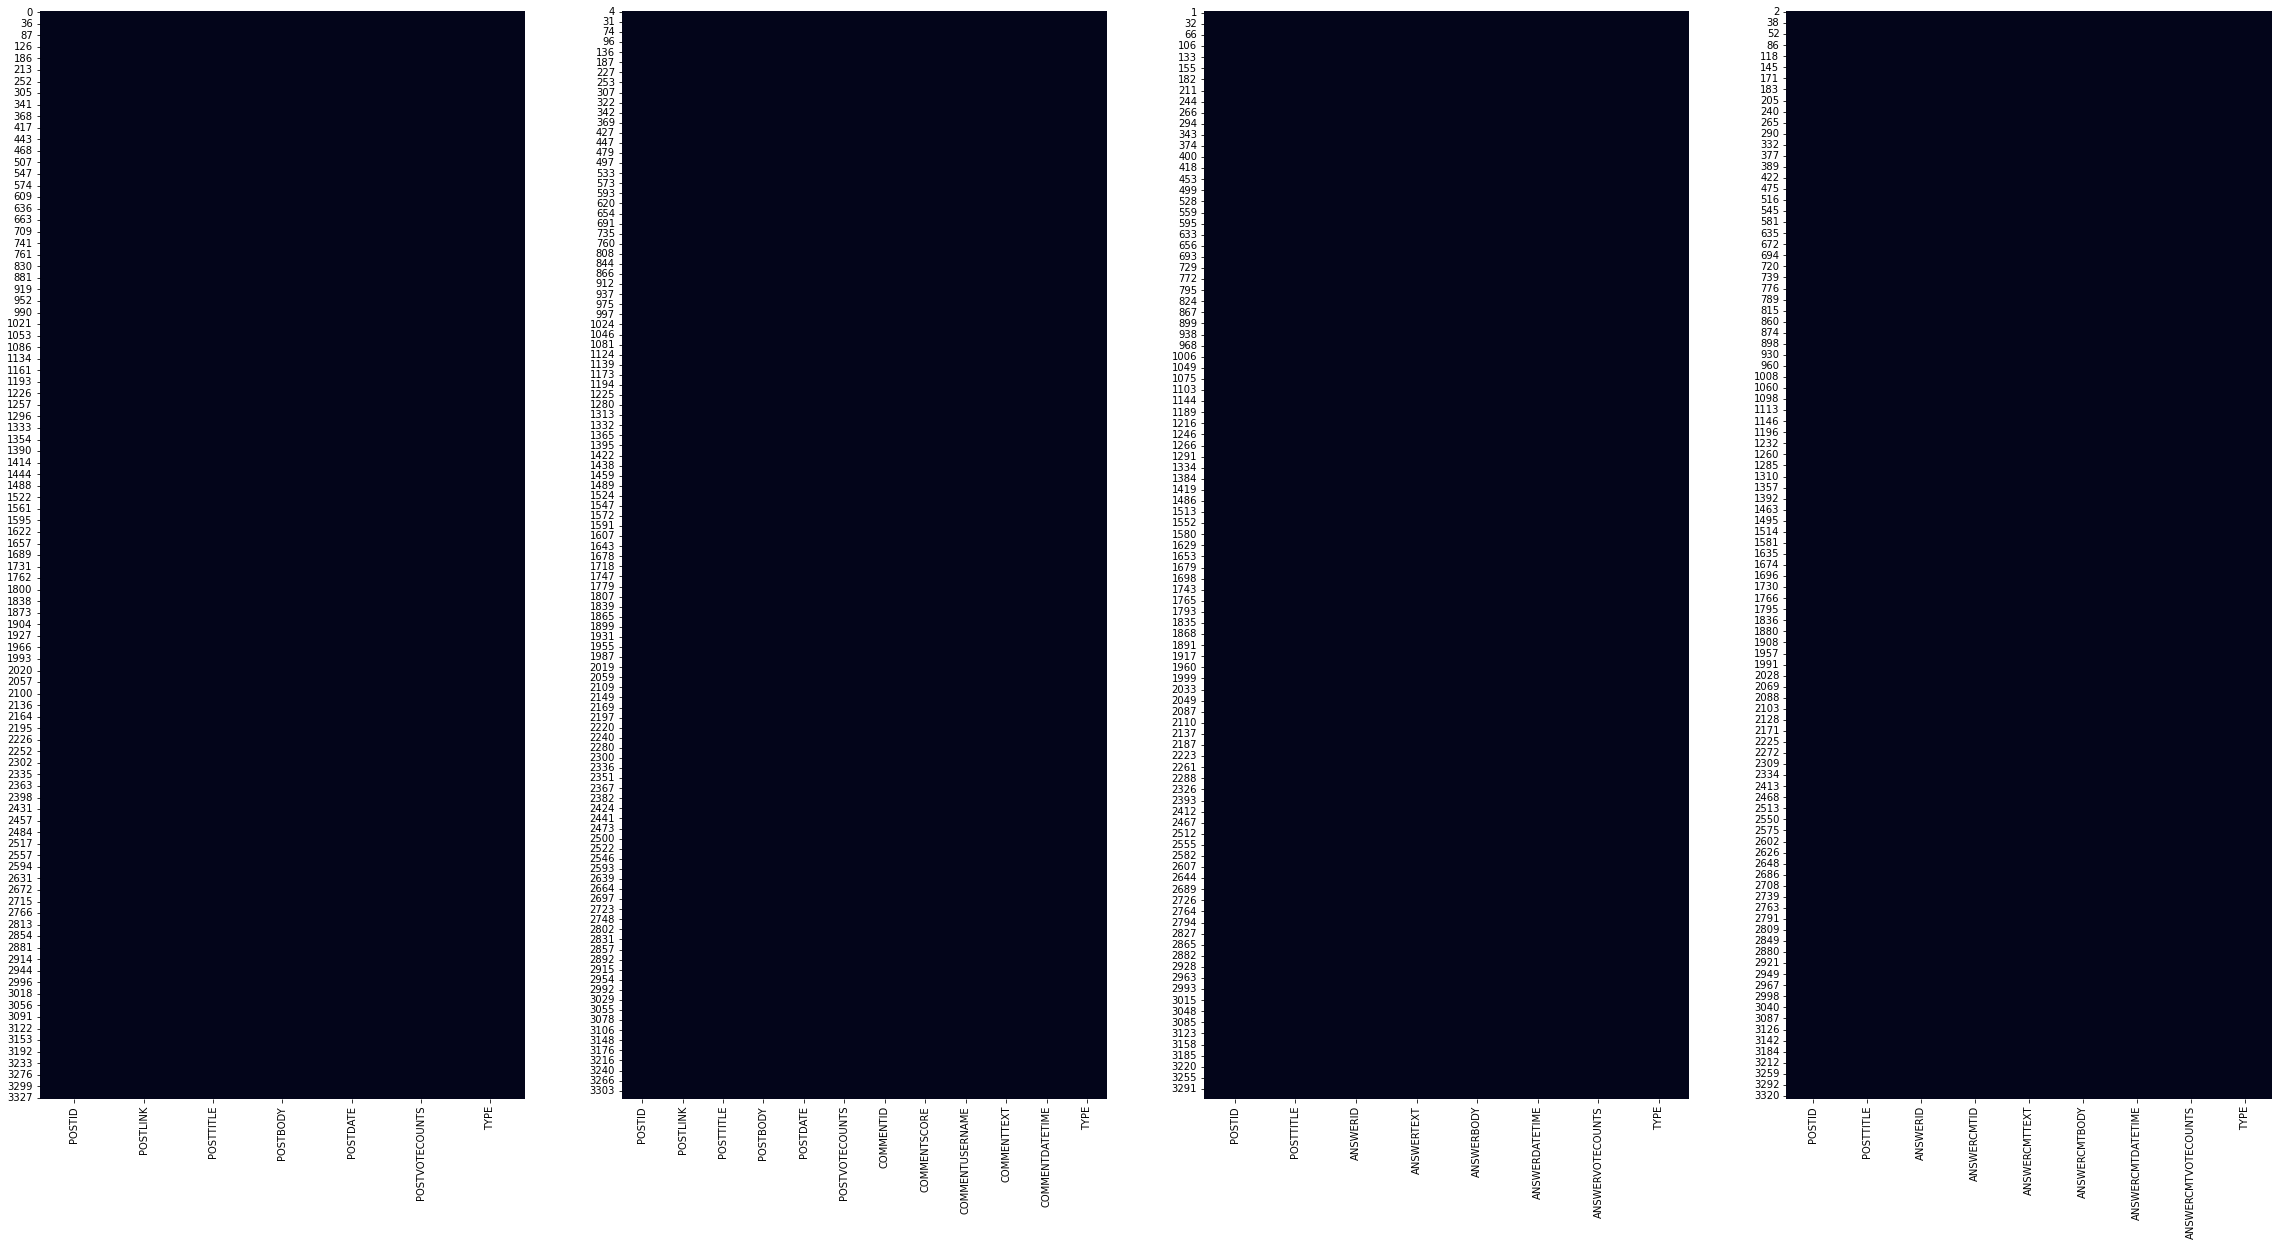

In [30]:
fig, axs = plt.subplots(1, 4, figsize=(40, 20))
sns.heatmap(dPOST.isnull(), cbar=False, ax=axs[0])
sns.heatmap(dfPC.isnull(), cbar=False, ax=axs[1])
sns.heatmap(dfAAC.isnull(), cbar=False, ax=axs[2])
sns.heatmap(dFACT.isnull(), cbar=False, ax=axs[3])
plt.show()

<AxesSubplot:xlabel='ANSWERCMTVOTECOUNTS', ylabel='Density'>

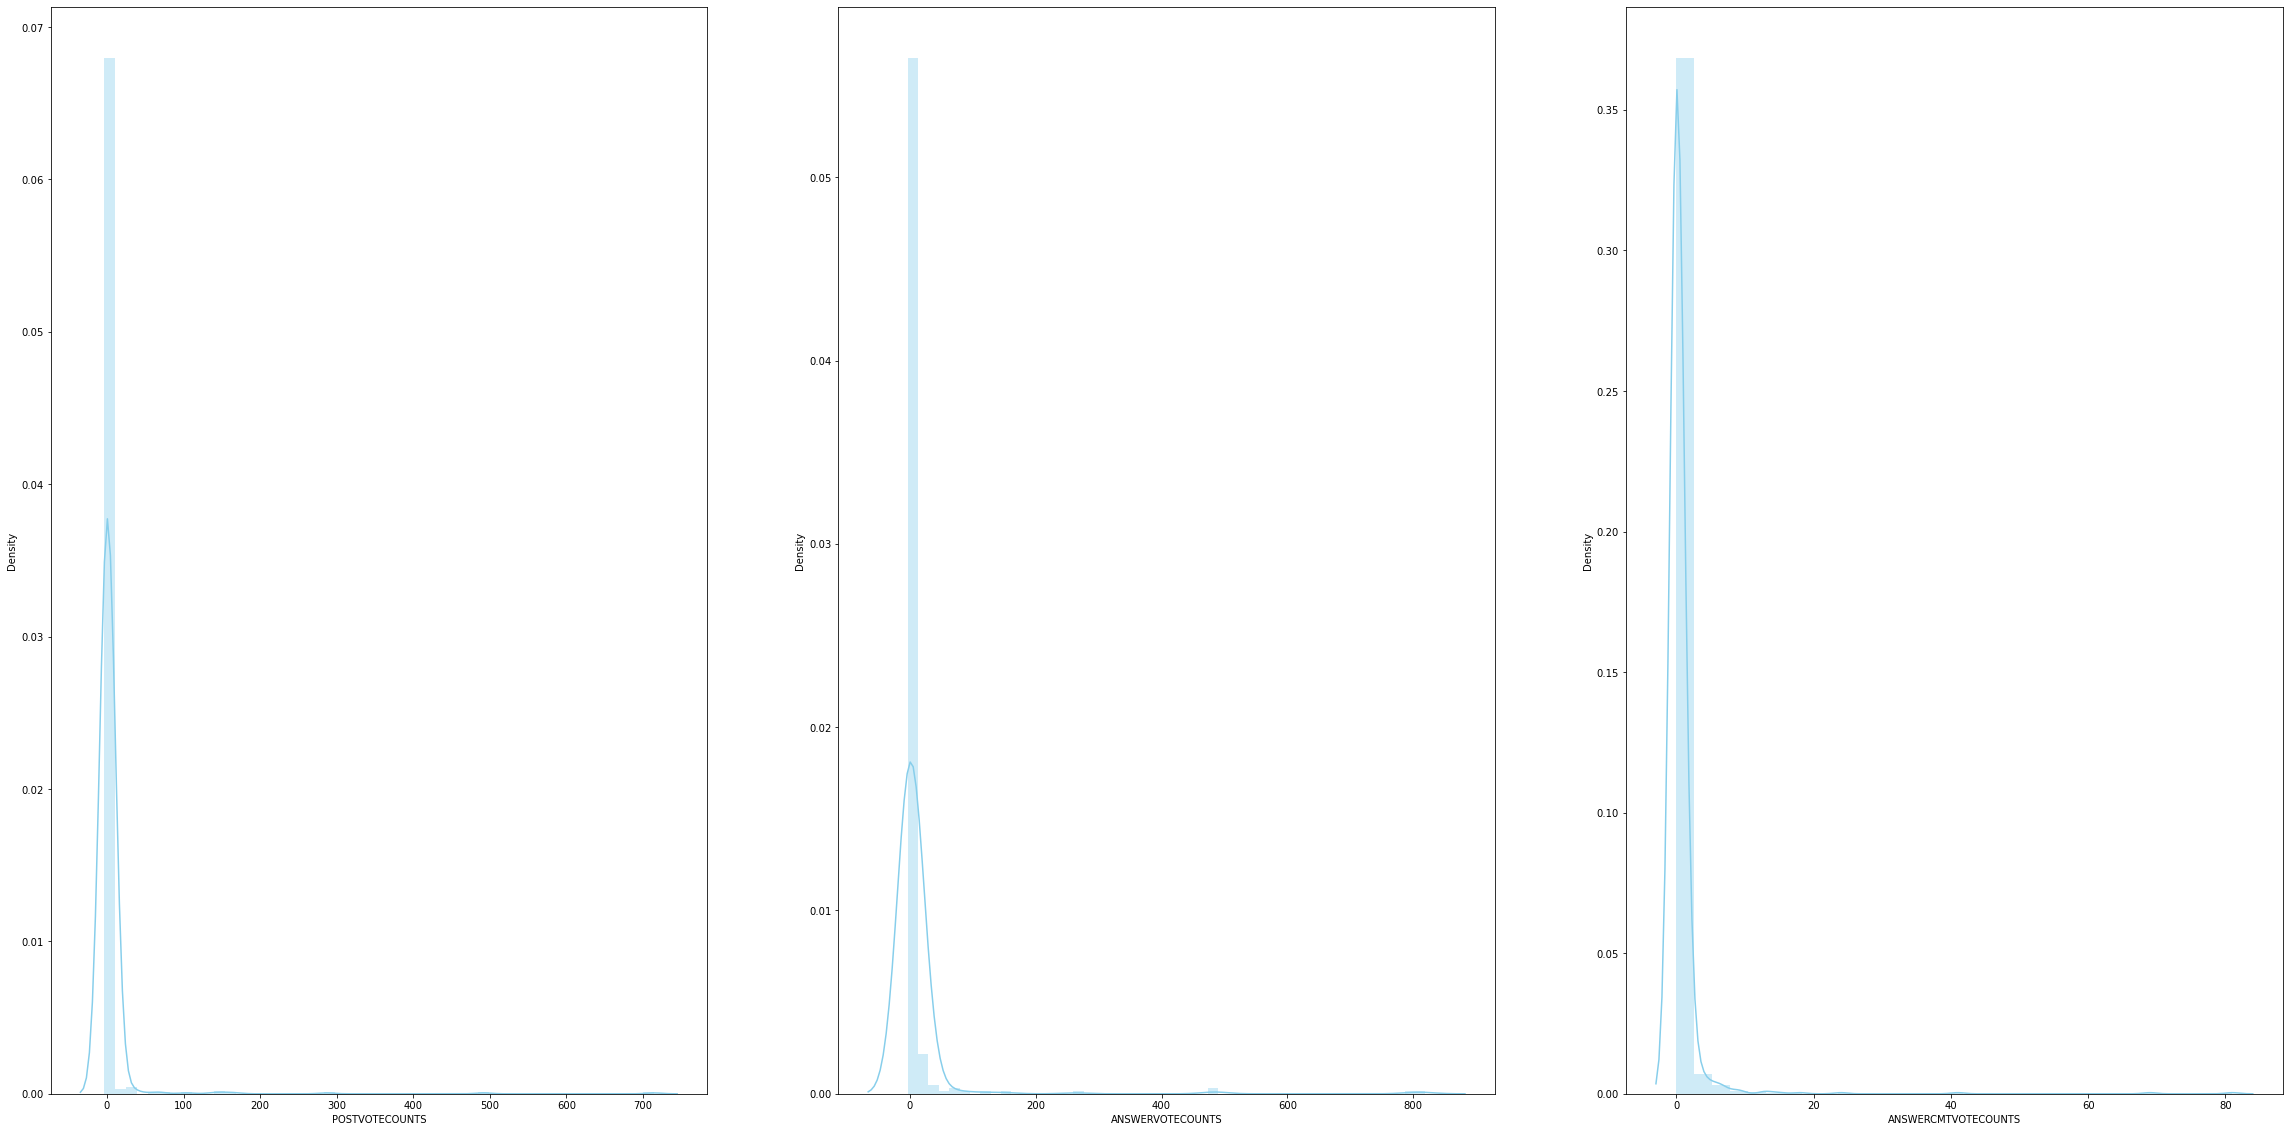

In [31]:
# show vote count distribution
fig, axs = plt.subplots(1, 3, figsize=(40, 20))
sns.distplot(dPOST['POSTVOTECOUNTS'] , color="skyblue", ax=axs[0])
sns.distplot(dfAAC['ANSWERVOTECOUNTS'] , color="skyblue", ax=axs[1])
sns.distplot(dFACT['ANSWERCMTVOTECOUNTS'] , color="skyblue", ax=axs[2])

In [32]:
# reset warnings
warnings.resetwarnings()

# Beginning of Idea A

### 1. String similarity to find related post

In [33]:
unique_values = df['POSTTITLE'].unique()
print("There are a total of {} unique titles".format(len(unique_values)))

There are a total of 659 unique titles


#### 1.1 Fuzzy Wuzzy

In [34]:
def calPartialRatio (str1, str2):
    return fuzz.partial_ratio(str1, str2)

def calTokenSortRatio (str1, str2):
    return fuzz.token_sort_ratio(str1, str2)

fuzzywuzzy_df = pd.DataFrame(columns=['postId', 'title', 'partial_ratio', 'token_sort_ratio'])
for unique_value in unique_values:
    # find the postId of the unique value
    postId = df[df['POSTTITLE'] == unique_value]['POSTID'].tolist()[0]
    fuzzywuzzy_df = pd.concat([fuzzywuzzy_df, pd.DataFrame({'postId': postId , 'title': unique_value, 'partial_ratio': calPartialRatio(unique_value, query), 'token_sort_ratio': calTokenSortRatio(unique_value, query)}, index=[0])], )

matchesPR = fuzzywuzzy_df.sort_values(by=['partial_ratio'], ascending=False)
matchesPR = matchesPR[matchesPR['partial_ratio'] > 50]

matchesTS = fuzzywuzzy_df.sort_values(by=['token_sort_ratio'], ascending=False)
matchesTS = matchesTS[matchesTS['token_sort_ratio'] > 50]

Top10MathesMerged = pd.concat([matchesTS, matchesPR]).drop_duplicates()
Top10MathesMerged['average'] = (Top10MathesMerged['token_sort_ratio'] + Top10MathesMerged['partial_ratio']) / 2
Top10MathesMerged = Top10MathesMerged.sort_values(by=['average'], ascending=False)

display(Top10MathesMerged)

,postId,title,partial_ratio,token_sort_ratio,average
0,73534338,React UseEffect render infinite loop,77,79,78.0
0,64651759,react useEffect hook causes infinite loop,71,71,71.0
0,58557877,React useEffect hook infinity loop,62,75,68.5
0,65558836,React useEffect hook is causing infinite loop,69,68,68.5
0,71835956,React UseEffect hook Issue Rendering an Interval,66,70,68.0
...,...,...,...,...,...
0,75100399,Listen localStorage in react(useEffect),31,52,41.5
0,67948692,Trigger react useEffect,30,52,41.0
0,71743687,react useEffect how to update data if two diff...,51,28,39.5
0,69724536,How to write a Jest-enzyme test case for code ...,54,24,39.0


#### 1.2 Bag of words approach (https://stackoverflow.com/questions/51623595/better-approach-than-fuzzywuzzy)

In [35]:
bag_words_df = pd.DataFrame(columns=['postId', 'title', 'score'])

def myScore(lst1, lst2):
    c = sum(el in lst1 for el in lst2)
    if (len(lst1) == 0 or len(lst2) == 0):
        retval = 0.0
    else:
        retval = 0.5 * (c/len(lst1) + c/len(lst2))

    return retval

query_tokenized = nltk.word_tokenize(query)

for unique_value in unique_values:
    postId = df[df['POSTTITLE'] == unique_value]['POSTID'].tolist()[0]
    bag_words_df = pd.concat([bag_words_df, pd.DataFrame({'postId': postId , 'title': unique_value, 'score': myScore(nltk.word_tokenize(unique_value), query_tokenized)}, index=[0])], )

TopMatchesBOW = bag_words_df.sort_values(by=['score'], ascending=False)
TopMatchesBOW = TopMatchesBOW[TopMatchesBOW['score'] > 0.5]
display(TopMatchesBOW)

,postId,title,score


#### 1.3 Spacy Similarity (https://stackoverflow.com/questions/52113939/spacy-strange-similarity-between-two-sentences)

In [36]:
spacy_sim = pd.DataFrame(columns=['postId', 'title', 'score'])
search_doc_no_stop_words = nlp(query)

for unique_value in unique_values:
    postId = df[df['POSTTITLE'] == unique_value]['POSTID'].tolist()[0]
    spacy_sim = pd.concat([spacy_sim, pd.DataFrame({'postId': postId , 'title': unique_value, 'score': search_doc_no_stop_words.similarity(nlp(unique_value))}, index=[0])], )

TopMatchesSpacy = spacy_sim.sort_values(by=['score'], ascending=False)
TopMatchesSpacy = TopMatchesSpacy[TopMatchesSpacy['score'] > 0.5]
display(TopMatchesSpacy)
print("{} number of titles found".format(len(TopMatchesSpacy)))

,postId,title,score
0,58557877,React useEffect hook infinity loop,0.782165
0,64651759,react useEffect hook causes infinite loop,0.728888
0,60984978,React useeffect hook,0.696022
0,60112511,Setting hook state inside React useEffect hook,0.682884
0,63800700,react useEffect hook cleanup,0.673840
0,57772851,React useEffect hook load onsnapshot condition...,0.666406
0,71032390,React useEffect hook dependency array,0.648506
0,71357152,React useEffect hook running infinite loop des...,0.646135
0,56914826,Using react useEffect hook,0.642261
0,68008264,React useEffect fetch hook makes endless calls...,0.632083


58 number of titles found


After testing, we observed that 
1. If the query is short and abstract, The fuzzy wuzzy method gives us a more accurate score
2. In the contradictary, if the query is long and comprehensive, The spacy similarity method gives a more accurate score

## 2. Group all comments into post

In [37]:
class GroupedComments: 
    def __init__(self, title, post, post_comments, answers, answer_comments): 
        self.title = title
        self.post = post
        self.post_comments = post_comments
        self.answers = answers
        self.answer_comments = answer_comments
        

def grouping(titleArr): 
    grouped = []
    for title in titleArr:
        post = dPOST[dPOST['POSTTITLE'].str.contains(title)]
        post_comments = dfPC[dfPC['POSTTITLE'].str.contains(title)]
        answers = dfAAC[dfAAC['POSTTITLE'].str.contains(title)]
        answer_comments = dFACT[dFACT['POSTTITLE'].str.contains(title)]
        grouped.append(GroupedComments(title, post, post_comments, answers, answer_comments))
    return grouped 

allcommentsGrouped = grouping(TopMatchesSpacy['title'].tolist())

display(allcommentsGrouped[2].post_comments)
display(allcommentsGrouped[2].answers)
display(allcommentsGrouped[2].answer_comments)

,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,COMMENTDATETIME,TYPE
2657,59059431,https://stackoverflow.com/questions/59059431/r...,React useeffect hook behaving not like i expected,\n \n<p>I am using react <code>...,2019-11-26 21:15:19Z,0,comment-104358901,0.0,Brian Thompson,"I deleted my answer, I think there were some p...",2019-11-26 21:38:03Z,post_comment
2658,59059431,https://stackoverflow.com/questions/59059431/r...,React useeffect hook behaving not like i expected,\n \n<p>I am using react <code>...,2019-11-26 21:15:19Z,0,comment-104359006,0.0,Faruk,i am modifying the exact document values i lis...,2019-11-26 21:42:39Z,post_comment
2659,59059431,https://stackoverflow.com/questions/59059431/r...,React useeffect hook behaving not like i expected,\n \n<p>I am using react <code>...,2019-11-26 21:15:19Z,0,comment-104359045,0.0,Ricardo Gonzalez,have you tried to use get method instead onSna...,2019-11-26 21:44:24Z,post_comment
2660,59059431,https://stackoverflow.com/questions/59059431/r...,React useeffect hook behaving not like i expected,\n \n<p>I am using react <code>...,2019-11-26 21:15:19Z,0,comment-104359143,0.0,Faruk,"@RicardoGonzalez no i didnt, but can onSnapsho...",2019-11-26 21:48:54Z,post_comment
2661,59059431,https://stackoverflow.com/questions/59059431/r...,React useeffect hook behaving not like i expected,\n \n<p>I am using react <code>...,2019-11-26 21:15:19Z,0,comment-104359259,1.0,Ricardo Gonzalez,As i understand i think that one of the onSnap...,2019-11-26 21:54:19Z,post_comment
2935,60984978,https://stackoverflow.com/questions/60984978/r...,React useeffect hook,\n \n<p>I'm having the followin...,2020-04-02 05:50:24Z,0,comment-107894054,1.0,Utsav Patel,Are you sure that your backend sends consisten...,2020-04-02 06:30:17Z,post_comment
2936,60984978,https://stackoverflow.com/questions/60984978/r...,React useeffect hook,\n \n<p>I'm having the followin...,2020-04-02 05:50:24Z,0,comment-107894458,0.0,jcruz,@UtsavPatel yes I'm testing my backend API wit...,2020-04-02 06:47:39Z,post_comment
2937,60984978,https://stackoverflow.com/questions/60984978/r...,React useeffect hook,\n \n<p>I'm having the followin...,2020-04-02 05:50:24Z,0,comment-107894480,0.0,jcruz,"When bad data is returned, it belongs to anoth...",2020-04-02 06:48:27Z,post_comment


,POSTID,POSTTITLE,ANSWERID,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,TYPE
2938,60984978,React useeffect hook,60985024.0,You have to convert the response to json with ...,('\n<p>You have to convert the response to jso...,2020-04-02 06:27:33Z,0,answer


,POSTID,POSTTITLE,ANSWERID,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
2939,60984978,React useeffect hook,60985024.0,107893975,"I've tried using both axios and fetch, now I'm...",('\n \n <span cl...,"Apr 2, 2020 at 6:27",0,answer_comment


In [38]:
display(allcommentsGrouped[2].answers['ANSWERBODY'].iloc[0])

'(\'\\n<p>You have to convert the response to json with await response.json();\\nand then use setState.</p>\\n\\n<pre class="lang-js s-code-block"><code class="hljs language-javascript"><span class="hljs-title function_">useEffect</span>(<span class="hljs-function">() =&gt;</span> {         \\n        <span class="hljs-variable language_">console</span>.<span class="hljs-title function_">log</span>(<span class="hljs-string">"useEffect TopTen has been called!"</span>);   \\n        <span class="hljs-keyword">const</span> <span class="hljs-title function_">fetchdata</span> = <span class="hljs-keyword">async</span> (<span class="hljs-params"></span>) =&gt; {\\n        <span class="hljs-keyword">const</span> response = <span class="hljs-keyword">await</span> api.<span class="hljs-title function_">topTen</span>();  <span class="hljs-comment">// this calls axios(url)</span>\\n        <span class="hljs-keyword">const</span> responseData = <span class="hljs-keyword">await</span> response.<span

In [39]:
allCommentsGroupedCleanedDict = {}
for idx, item in enumerate(allcommentsGrouped):
    comments = []
    answers = []
    answers_cmts = []
    
    for (index, comment) in item.post_comments['COMMENTTEXT'].iteritems():
      comment_idx = item.post_comments[item.post_comments['COMMENTTEXT'] == comment]['COMMENTID'].tolist()[0]
      comment_votes = item.post_comments[item.post_comments['COMMENTTEXT'] == comment]['COMMENTSCORE'].tolist()[0]
      comment_dt = item.post_comments[item.post_comments['COMMENTTEXT'] == comment]['COMMENTDATETIME'].tolist()[0]
      if str(comment) != 'nan':
        comments.append({
          "comment": comment, 
          "id": comment_idx,
          "votes": comment_votes,
          "datetime": comment_dt
        })
    comments_joined = ' '.join([str(elem['comment']) for elem in comments])

    for (index, answer) in item.answers['ANSWERBODY'].iteritems():
      answer_idx = item.answers[item.answers['ANSWERBODY'] == answer]['ANSWERID'].tolist()[0]
      answer_votes = item.answers[item.answers['ANSWERBODY'] == answer]['ANSWERVOTECOUNTS'].tolist()[0]
      answer_dt = item.answers[item.answers['ANSWERBODY'] == answer]['ANSWERDATETIME'].tolist()[0]
      if str(answer) != 'nan':
        answers.append({
          "answer": answer,
          "id": answer_idx,
          "votes": answer_votes,
          "datetime": answer_dt
        })
        
    answers_joined = ' '.join([str(elem['answer']) for elem in answers])
    
    for (index, answer_cmt) in item.answer_comments['ANSWERCMTBODY'].iteritems():
      answer_cmt_idx = item.answer_comments[item.answer_comments['ANSWERCMTBODY'] == answer_cmt]['ANSWERCMTID'].tolist()[0]
      answer_cmt_votes = item.answer_comments[item.answer_comments['ANSWERCMTBODY'] == answer_cmt]['ANSWERCMTVOTECOUNTS'].tolist()[0]
      answer_cmt_dt = item.answer_comments[item.answer_comments['ANSWERCMTBODY'] == answer_cmt]['ANSWERCMTDATETIME'].tolist()[0]
      if str(answer_cmt) != 'nan':
        answers_cmts.append({
          "answer_cmt": answer_cmt,
          "id": 1,
          "votes": answer_cmt_votes,
          "datetime": answer_cmt_dt
        })
        
    answers_cmts_joined = ' '.join([str(elem['answer_cmt']) for elem in answers_cmts])
    
    allCommentsGroupedCleanedDict[item.title] = {
      "comments": comments,
      "answers": answers,
      "answer_comments": answers_cmts,
      "comments_joined": comments_joined,
      "answers_joined": answers_joined,
      "answers_cmts_joined": answers_cmts_joined
    }

print("{} number of post instances".format(len(allCommentsGroupedCleanedDict)))

print(yaml.dump(allCommentsGroupedCleanedDict, allow_unicode=True, default_flow_style=False))

/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_19024/3825044782.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (index, comment) in item.post_comments['COMMENTTEXT'].iteritems():
/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_19024/3825044782.py:20: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (index, answer) in item.answers['ANSWERBODY'].iteritems():
/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_19024/3825044782.py:34: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (index, answer_cmt) in item.answer_comments['ANSWERCMTBODY'].iteritems():


58 number of post instances
Can I use an if statement within a React useEffect hook like this?:
  answer_comments: []
  answers: []
  answers_cmts_joined: ''
  answers_joined: ''
  comments: []
  comments_joined: ''
Confusing React useEffect hook behaviour:
  answer_comments:
  - answer_cmt: '(''\n                \n                <span class="comment-copy">well
      explained. I get the concept of closure over surrounding scope at render time.
      It completely makes sense now. Thanks for the effort.</span>\n                \n                <div
      class="d-inline-flex ai-center">\n–&nbsp;<a href="/users/14843021/chief-dot101"
      title="111 reputation" class="comment-user owner">chief dot101</a>\n                </div>\n                <span
      class="comment-date" dir="ltr"><a class="comment-link" href="#comment121656393_68837638"
      aria-label="Link to comment"><span title="2021-08-18 18:43:26Z, License: CC
      BY-SA 4.0" class="relativetime-clean">Aug 18, 2021 at 

## 3. Preprocessing

In [40]:
stopwords = set(stopwords.words('english'))

#### 3.1 Finding tech related stop words

#### 3.2 Extract url from text

In [41]:
def extractUrl(text):
    # get url from text
    text = re.findall(r'(https?://\S+)', text)
    return text

#### 3.3 Remove code blocks

In [42]:
def removeCodeBlocks(text):
    # remove blocks with classname code-block
    text = re.sub(r'<pre class="code-block">.*?</pre>', '', text, flags=re.DOTALL)
    # remove code tag
    text = re.sub(r'<code>.*?</code>', '', text, flags=re.DOTALL)
    # remove every code tag with class name
    text = re.sub(r'<code class=".*?">.*?</code>', '', text, flags=re.DOTALL)
    return text
  
def removeSpaces(text):
    # remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    return text
  
def removeslashn(text):
    # remove multiple spaces
    text = re.sub(r'\n\n\n ', ' ', text)
    return text

#### 3.4 Remove HTML Tags

In [43]:
def removeHTMLTags(text):
    # remove html tags
    text = re.sub(r'<[^>]*>', '', text)
    return text

#### 3.5 Lemmetization

In [44]:
lemmer = WordNetLemmatizer()
stemmer = PorterStemmer()
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v')) 

#### 3.6 Running the pipeline

In [45]:
def preprocessText(text):
  text = removeCodeBlocks(text)
  text = removeHTMLTags(text)
  text = re.sub(r'(https?://\S+)', '', text)
  text = text.replace("('", '')
  text = text.replace("',)", '')
  text = re.sub(r"\\n", '', text)
  text = re.sub(r'–&nbsp;', '', text)
  
  # remove empty spaces 
  text = removeSpaces(text)
  
  return text

for key, value in allCommentsGroupedCleanedDict.items():
    allcomments = []
    allanswers = []
    allanswercomments = []
    
    if value['comments']:
      for comment in value['comments']:
        if comment['comment']:
          indi_comment = comment['comment']
          url = extractUrl(indi_comment)
          indi_comment = preprocessText(indi_comment)
          # indi_comment = ' '.join([word for word in indi_comment.split() if word not in (stopwords)]) 
          
          comment['comment'] = indi_comment
          comment['url'] = url
          allcomments.append(indi_comment)

    # processing answers
    if value['answers']:
      for answer in value['answers']:
        if answer['answer']:
          indi_answer = answer['answer']
          url = extractUrl(indi_answer)
          indi_answer = preprocessText(indi_answer)
          indi_answer = lemmatize_stemming(indi_answer)
          # indi_answer = ' '.join([word for word in indi_answer.split() if word not in (stopwords)])
          
          answer['answer'] = indi_answer
          answer['url'] = url
          allanswers.append(indi_answer)
          
    # processing answer_comments
    if value['answer_comments']:
      for answer_cmt in value['answer_comments']:
        if answer_cmt['answer_cmt']:
          indi_answer_cmt = answer_cmt['answer_cmt']
          url = extractUrl(indi_answer_cmt)
          indi_answer_cmt = preprocessText(indi_answer_cmt)
          # indi_answer_cmt = ' '.join([word for word in indi_answer_cmt.split() if word not in (stopwords)]) 

          answer_cmt['answer_cmt'] = indi_answer_cmt
          answer_cmt['url'] = url
          allanswercomments.append(indi_answer_cmt)
          
    value['comments_joined'] = ' '.join(allcomments)
    value['answers_joined'] = ' '.join(allanswers)
    value['answers_cmts_joined'] = ' '.join(allanswercomments)
    # replace the value of the key
    allCommentsGroupedCleanedDict[key] = value
    
print(yaml.dump(allCommentsGroupedCleanedDict, allow_unicode=True, default_flow_style=False))

Can I use an if statement within a React useEffect hook like this?:
  answer_comments: []
  answers: []
  answers_cmts_joined: ''
  answers_joined: ''
  comments: []
  comments_joined: ''
Confusing React useEffect hook behaviour:
  answer_comments:
  - answer_cmt: ' well explained. I get the concept of closure over surrounding scope
      at render time. It completely makes sense now. Thanks for the effort. chief
      dot101 Aug 18, 2021 at 18:43 '
    datetime: Aug 18, 2021 at 18:43
    id: 1
    url: []
    votes: 0
  answers:
  - answer: 'to understand the output of the code, you need to understand the fundamental
      concepts of how react updates the state and the concept of a closure.state updates
      are asynchronousevery call to state setter function such as is scheduled - state
      is not updated immediately.as a result, logging the value of immediately after
      calling will log the old value of .state is constant within a particular render
      of a componentstate i

#### 3.5 Stop Words Removal (based on step 1)

In [46]:
# translate_table = dict((ord(char), None) for char in punctuation if char not in [' ', '\t', ' ', '\r', ",", ';', '?', '!'])
# translate_table.update(dict((ord(char), None) for char in string.digits))

# # find tech related stop words
# tech_stopwords = set(stopwords.words('english'))

## 4. Sentence Scoring

In [47]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
def frequencyCounting(text, verbose = False):
  translate_table = dict((ord(char), None) for char in punctuation if char not in [' ', '\t', ' ', '\r', ",", ';', '?', '!'])
  translate_table.update(dict((ord(char), None) for char in string.digits))

  compiledCommentsForFirstPost = text.translate(translate_table)

  word_frequencies = {}
  for word in word_tokenize(compiledCommentsForFirstPost):
      word = SnowballStemmer("english").stem(word)
      if word not in stopwords:
          if word not in punctuation:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1

  maximum_frequncy = max(word_frequencies.values(), default=0)
  for word in word_frequencies.keys():
      word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)
  
  if(verbose):
    print(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True))

  sentence_list = sent_tokenize(compiledCommentsForFirstPost)
  
  if(verbose):
    print('total sentences: ', len(sentence_list))

  sentence_scores = {}
  for sent in sentence_list:
      sentence = sent.split()
      for word in sentence:        
          if word.lower() in word_frequencies.keys():
              if sent not in sentence_scores.keys():
                  sentence_scores[sent] = word_frequencies[word.lower()]
              else:
                  sentence_scores[sent] += word_frequencies[word.lower()]
                  
  if(verbose):
    print('scores for sentences: ', sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True))
  
  return sentence_scores, sentence_list
  

results = []
for i in range(0, len(allCommentsGroupedCleanedDict)):
  comments_answers_answerscmt = allCommentsGroupedCleanedDict[list(allCommentsGroupedCleanedDict.keys())[i]]['comments_joined'] + ' ' + allCommentsGroupedCleanedDict[list(allCommentsGroupedCleanedDict.keys())[i]]['answers_joined'] + ' ' + allCommentsGroupedCleanedDict[list(allCommentsGroupedCleanedDict.keys())[i]]['answers_cmts_joined']
  
  if(len(comments_answers_answerscmt) > 0):
    sentence_scores, sentence_list = frequencyCounting(comments_answers_answerscmt, verbose=False)
    results.append({
      "title": list(allCommentsGroupedCleanedDict.keys())[i],
      "sentence_scores": sentence_scores,
      "sentence_list": sentence_list
    })
    summary_sentences = heapq.nlargest(5, sentence_scores, key=sentence_scores.get)

for result in results:
  if len(result['sentence_scores']) == 0:
    averageSentenceScore = 0
    result['avg_score'] = 0
    result['sentence_scores'] = 0
    break
  
  averageSentenceScore = sum(result['sentence_scores'].values()) / len(result['sentence_scores'])
  result['sentence_scores'] = result['sentence_scores'].values()
  result['avg_score'] = averageSentenceScore

first_summary = pd.DataFrame(results)
first_summary = first_summary.sort_values(by=['avg_score'], ascending=False)
display(first_summary)

,title,sentence_scores,sentence_list,avg_score
13,Confusing React useEffect hook behaviour,(48.619047619047684),[ State update is asynchronous State is const...,48.619048
21,How can I make this React useEffect hook work ...,"(3.5, 29.5)",[I tried your first sandbox and printed all th...,16.500000
10,React useEffect hook is causing infinite loop,(16.4),[You can pass a dependency array as the last a...,16.400000
4,react useEffect hook cleanup,"(1.9999999999999998, 30.428571428571406)","[I doubt, someone may explain that in more com...",16.214286
15,React useEffect hook doesn't clear interval,(16.0),[ this may works for youclearintervel when tim...,16.000000
2,React useeffect hook,"(5.57142857142857, 4.857142857142858, 27.85714...","[I deleted my answer, I think there were some ...",12.761905
17,componentWillUnmount with React useEffect hook,"(0.5714285714285714, 14.571428571428573, 12.42...",[What is it that you want to do when the compo...,9.571429
3,Setting hook state inside React useEffect hook,"(12.333333333333337, 2.333333333333333)","[I dont think you need setContentnull;, also t...",7.333333
1,react useEffect hook causes infinite loop,"(1.3333333333333333, 12.000000000000004)","[Not the cause of issue, but what is const Use...",6.666667
18,React useEffect stop infinite loop,"(7.200000000000002, 3.8000000000000007, 13.399...",[let moviesData is a new array on every rend...,6.550000


## 5. Sentiment Analysis

#### 5.1 Preparing the sentences

In [48]:
allCommentsGroupedCleanedSentDict = copy.deepcopy(allCommentsGroupedCleanedDict)

allCommentsGroupedCleanedSentDict = {k: v for k, v in allCommentsGroupedCleanedSentDict.items() if v['comments'] or v['answers'] or v['answer_comments']}
for key, value in allCommentsGroupedCleanedSentDict.items():
  del value['answers_cmts_joined']
  del value['answers_joined']
  del value['comments_joined']
  
  # make new key 
  value['all_sentences'] = []
  all_comments_arr = []
  all_answers_arr = []
  all_answer_cmts_arr = []
   
  for comment in value['comments']:
    if comment['comment']: 
      all_comments_arr.append(comment['comment'])
    
  for answer in value['answers']:
    if answer['answer']:
      all_answers_arr.append(answer['answer'])
    
  for answer_cmt in value['answer_comments']:
    if answer_cmt['answer_cmt']:
      all_answer_cmts_arr.append(answer_cmt['answer_cmt'])

  value['all_sentences'] =  all_comments_arr + all_answers_arr + all_answer_cmts_arr
  
  # sentence tokenization
  value['all_sentences'] = [sent_tokenize(sentence) for sentence in value['all_sentences']]
  # flatten 
  value['all_sentences'] = [item for sublist in value['all_sentences'] for item in sublist]

print(yaml.dump(allCommentsGroupedCleanedSentDict, allow_unicode=True, default_flow_style=False))

Confusing React useEffect hook behaviour:
  all_sentences:
  - '1.'
  - State update is asynchronous.
  - '2.'
  - State is constant within a particular render of a component.
  - '3.'
  - Component can't see the updated state until it re-renders.
  - '4.'
  - Callback function of the useEffect hook has a closure over the state.
  - Thanks for your comment, but it's too much theory for a beginner like me.
  - I don't understand.
  - React batches all the useState updates and commits them at once since it is async.
  - But console.log prints the value at the time when it is encountered and does not
    wait for react to update the status before logging the info
  - 'See: github.com/streamich/react-use/blob/master/docs/useLatest.md'
  - to understand the output of the code, you need to understand the fundamental concepts
    of how react updates the state and the concept of a closure.state updates are
    asynchronousevery call to state setter function such as is scheduled - state is
   

##### 5.2 Scoring post with sentiment

In [49]:
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
config = AutoConfig.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

allCommentsGroupedCleanedSentDict = copy.deepcopy(allCommentsGroupedCleanedSentDict)

for key, value in allCommentsGroupedCleanedSentDict.items():
  list_of_sentences = value['all_sentences']
  print('working on', key, 'with', len(list_of_sentences), 'sentences')
  print(yaml.dump(list_of_sentences, allow_unicode=True, default_flow_style=False))
  output = model(**tokenizer(list_of_sentences, padding=True, truncation=True, return_tensors="pt"))

  list_of_sentences_with_sentiment = []

  for j in range(len(list_of_sentences)):
    scores = output[0][j].detach().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    for i in range(scores.shape[0]):
        l = config.id2label[ranking[i]]
        s = scores[ranking[i]]

        if(list_of_sentences[j] not in [ sentence['sentence'] for sentence in list_of_sentences_with_sentiment]):
          list_of_sentences_with_sentiment.append(
            {
              'sentence': list_of_sentences[j],
              l:  np.round(float(s), 4),
            }
          )
        else:
          index =  [ sentence['sentence'] for sentence in list_of_sentences_with_sentiment].index(list_of_sentences[j])
          list_of_sentences_with_sentiment[index][l] = np.round(float(s), 4)
        

  averagePositiveSentimentScore = sum([ sentence['positive'] for sentence in list_of_sentences_with_sentiment]) / len(list_of_sentences_with_sentiment)
  averageNegativeSentimentScore = sum([ sentence['negative'] for sentence in list_of_sentences_with_sentiment]) / len(list_of_sentences_with_sentiment)
  averageNeutralSentimentScore = sum([ sentence['neutral'] for sentence in list_of_sentences_with_sentiment]) / len(list_of_sentences_with_sentiment)
  
  value['all_sentences_with_sentiment'] = list_of_sentences_with_sentiment
  value['avg_positive_sentiment'] = averagePositiveSentimentScore
  value['avg_negative_sentiment'] = averageNegativeSentimentScore
  value['avg_neutral_sentiment'] = averageNeutralSentimentScore

print(yaml.dump(allCommentsGroupedCleanedSentDict, allow_unicode=True, default_flow_style=False))

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


working on React useEffect hook infinity loop with 18 sentences
- I don't think the second variation can cause you an infinite loop since the effect
  will only run once.
- '@ShubhamKhatri you would think that but sadly it does'
- You should pass api function as dependency to useEffect.
- useEffect(() => { (async () => { PostApi.getPostsByUser(auth.user._id, auth.token).then(response
  => setPosts(response)) })() },[PostApi.getPostsByUser])
- Can we see your PostApi code?
- '@ShubhamKhatri I updated the op and added the code there'
- change:and
- you can try like this.
- run code snippethide resultsexpand snippet
- ' Still endless looping Anthony Gayflor Oct 25, 2019 at 12:05'
- ' Can you post setPosts function Oleg Oct 25, 2019 at 12:09'
- ' Anthony Gayflor Oct 25, 2019 at 12:09'
- ' Post your functional component declaration in question Oleg Oct 25, 2019 at 12:11'
- ' What is useProfile?'
- may be useState ?
- Oleg Oct 25, 2019 at 12:25
- ' Sadly it’s still looping, I don’t understan

## 6. Rank Post

In [50]:
warnings.filterwarnings('ignore')

allCommentsSentiment = copy.deepcopy(allCommentsGroupedCleanedSentDict)

# sort by avg positive sentiment
allCommentsSentiment = {k: v for k, v in allCommentsSentiment.items() if v['avg_positive_sentiment'] or v['avg_negative_sentiment'] or v['avg_neutral_sentiment']}
allCommentsSentiment = {k: v for k, v in sorted(allCommentsSentiment.items(), key=lambda item: item[1]['avg_positive_sentiment'], reverse=True)}

ACS_df = pd.DataFrame()
for key, value in list(allCommentsSentiment.items()):
  ACS_df = ACS_df.append({
    'title': key,
    'avg_positive_sentiment': value['avg_positive_sentiment'],
    'avg_negative_sentiment': value['avg_negative_sentiment'],
    'avg_neutral_sentiment': value['avg_neutral_sentiment'],
    'sentence_list' : value['all_sentences']
  }, ignore_index=True)
warnings.resetwarnings()

ACS_df = ACS_df.sort_values(by=['avg_positive_sentiment', 'avg_neutral_sentiment'], ascending=False)
display(ACS_df.head(10))

,title,avg_positive_sentiment,avg_negative_sentiment,avg_neutral_sentiment,sentence_list
0,React useEffect hook does not fire when prop d...,0.354958,0.115833,0.529200,[Did you try to pass different photo prop valu...
1,react useEffect hook triggers only once althou...,0.349400,0.164017,0.486583,[because there is no value change for error &a...
2,React useEffect hook does not call after recoi...,0.340286,0.143343,0.516357,[One thing that stands out to me is that you a...
3,React useEffect hook doesn't clear interval,0.281500,0.159580,0.558960,[this may works for you:clearintervel when tim...
4,How do I fire React useEffect hook only once a...,0.279617,0.055508,0.664892,[Why do you want to update state1 from asyncFn...
5,Unexpected behaviour using React useEffect hook,0.242813,0.160796,0.596396,"[The line where you have used useState hook, y..."
6,Confusing React useEffect hook behaviour,0.228710,0.099686,0.671610,"[1., State update is asynchronous., 2., State ..."
7,react useEffect hook cleanup,0.214458,0.230279,0.555279,"[I doubt, someone may explain that in more com..."
8,Loading spinner with react useEffect hook and ...,0.209583,0.219074,0.571343,"[why this statement : ""I am using react hook u..."
9,componentWillUnmount lifecycle with react usee...,0.207567,0.058167,0.734267,"[yes there is, everything is explained in the ..."


## 7. Summarize Top 5 

In [62]:
allCommentsSentimentSum = copy.deepcopy(allCommentsSentiment)
#only take top 5
allCommentsSentimentSum = {k: v for k, v in list(allCommentsSentimentSum.items())[:5]}

top_5_ACS_df = ACS_df.head(5)
display(top_5_ACS_df)

top_5_ACS_dict = top_5_ACS_df.to_dict('index')

print(top_5_ACS_dict)

,title,avg_positive_sentiment,avg_negative_sentiment,avg_neutral_sentiment,sentence_list
0,React useEffect hook does not fire when prop d...,0.354958,0.115833,0.529200,[Did you try to pass different photo prop valu...
1,react useEffect hook triggers only once althou...,0.349400,0.164017,0.486583,[because there is no value change for error &a...
2,React useEffect hook does not call after recoi...,0.340286,0.143343,0.516357,[One thing that stands out to me is that you a...
3,React useEffect hook doesn't clear interval,0.281500,0.159580,0.558960,[this may works for you:clearintervel when tim...
4,How do I fire React useEffect hook only once a...,0.279617,0.055508,0.664892,[Why do you want to update state1 from asyncFn...


{0: {'title': 'React useEffect hook does not fire when prop dependency changes', 'avg_positive_sentiment': 0.3549583333333333, 'avg_negative_sentiment': 0.11583333333333334, 'avg_neutral_sentiment': 0.5292, 'sentence_list': ['Did you try to pass different photo prop value to the component and checked whether the useEffect is triggered ?.', 'useEffect will trigger only when the new value is different from the Old Value.', 'Yes, have tried using a different prop instead of passing an empty array and it still does not trigger the useEffect.', 'as per the console screenshot, i felt your passing the same value to the props, thats why i informed like that, if you added your passing props, it will great to check exact issue', 'try to make sure your prop is immutable, meaning, you send a new array each time there is a change and not mutating the array', ' Perhaps this is more valuable as a comment than as an answer, but thanks for helping out Mese Feb 19, 2020 at 10:26', ' Thanks to you I have

In [63]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

for key, value in top_5_ACS_dict.items():
    print("Summarizing ", key)
    joined_sentence = ' '.join(value['sentence_list'])
    if len(joined_sentence) > 1024:
      joined_sentence = joined_sentence[:1020] 
    input_ids = tokenizer.encode(joined_sentence, return_tensors='pt')
    summary_ids = model.generate(input_ids)
    print(tokenizer.decode(summary_ids[0], skip_special_tokens=True))
    top_5_ACS_dict[key]['summary'] = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    
print(yaml.dump(top_5_ACS_dict, allow_unicode=True, default_flow_style=False))

Summarizing  0


/Users/shaun/miniforge3/lib/python3.9/site-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 142 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Did you try to pass different photo prop value to the component and checked whether the useEffect is triggered?. useEffect will trigger only when the new value is different from the Old Value. Yes, have tried using a different prop instead of passing an empty array and it still does not trigger the use effect. I was modifying an array using and passing it through as the new prop. is not immutable.
Summarizing  1
because there is no value change for error &amp; message property. error value is always assigning as "true". try listening the entire state itself.or you need to reset the error value on post request. Thanks! TyForHelpDude May 1, 2021 at 12:59.
Summarizing  2
One thing that stands out to me is that you are directly modifying the recoil state with this: let dlist = deadlinglines; dlist.push({ /*...*/}); dlist is a reference to the actual state. You should instead clone the existing list. when dealing with arrays in state hooks, you need to clone the array as you do the set func

-Friday-
Maybe we can think of summarizing before sentiment analysis
After sentiment analysis, we can judge if the post is indeed good enough.